In [83]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [86]:
folder_path = "Data\OralCancer\cancer"
images = []
labels = []
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(folder_path, filename)
        image = Image.open(image_path)
        if image.mode != 'RGB':
                image = image.convert('RGB')
        image_resize = image.resize((512, 512))
        image_array = np.array(image_resize)
        image_vector = image_array.flatten()
        images.append(image_vector)
        labels.append(0)

c:\Users\WORK\anaconda3\lib\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [87]:
folder_path = "Data\\OralCancer\\non-cancer"
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(folder_path, filename)
        image = Image.open(image_path)
        if image.mode != 'RGB':
                image = image.convert('RGB')
        image_resize = image.resize((512, 512))
        image_array = np.array(image_resize)
        image_vector = image_array.flatten()
        images.append(image_vector)
        labels.append(1)

In [88]:
X = np.array(images)
X.shape

(116, 786432)

In [89]:
z_score_scaler = StandardScaler()
X_scaled = z_score_scaler.fit_transform(X)

In [93]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

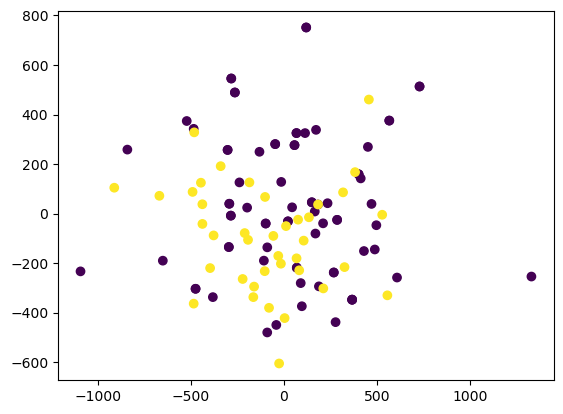

In [101]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = labels)
plt.show()

In [97]:
from ipywidgets import interact

def plot_3d(elev=20, azim=30):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter3D(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c = labels)
    # ax.scatter3D(centroids.T[0],centroids.T[1], centroids.T[2], edgecolors='red')
    ax.view_init(elev=elev, azim=azim)
    plt.show()

interact(plot_3d, elev=(-90, 90), azim=(-180, 180))

interactive(children=(IntSlider(value=20, description='elev', max=90, min=-90), IntSlider(value=30, descriptio…

<function __main__.plot_3d(elev=20, azim=30)>

In [98]:
model = DBSCAN(eps = 0.5, min_samples=2)
model.fit(X_pca)
model.labels_

array([ 0, -1,  1,  2,  3,  4,  5,  6, -1,  7,  8, -1,  9, -1,  9, -1,  7,
       -1, -1, -1,  3,  4, -1, -1,  5,  2, -1, -1, -1,  0, -1,  6, -1,  9,
       10, 11, 12, -1, 13, 14, 15, 16, 17, -1, -1, -1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, 18, 19, 20, 14, 15, 13, 12, 17, 16, 11, 21, 10,
       19, 20, -1, -1, 18, -1, -1, 21, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  8, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [100]:
model.components_.shape

(45, 3)

In [111]:
X_scaled[0].reshape(3, 512, 512)

array([[[ 0.02399313, -0.83647707, -0.73448483, ..., -0.31042022,
         -0.01300018, -0.21523846],
        [-0.35114453,  0.00156319, -0.18739127, ...,  0.12409331,
          0.16190673,  0.14688675],
        [-0.08343413, -0.0584793 ,  0.08967079, ...,  0.67693194,
          0.51279773,  0.51297862],
        ...,
        [-0.24874043, -0.12109767,  0.22016006, ...,  0.38880944,
         -0.05246795, -0.12614212],
        [-1.09470305, -1.33491283, -1.17398925, ...,  0.85935198,
          0.66238225,  0.35441535],
        [ 0.62606771,  0.58373029,  0.05478625, ..., -0.38879215,
         -0.23748392,  0.12356499]],

       [[-0.30635766, -0.17713836,  0.20216686, ...,  0.2077702 ,
         -0.24463935, -0.28713988],
        [-1.0716435 , -1.28047498, -1.10933563, ...,  0.79630119,
          0.62622956,  0.15297656],
        [ 0.44009517,  0.60834582,  0.08857191, ..., -0.4291238 ,
         -0.28384067,  0.0933467 ],
        ...,
        [-0.64980643, -0.73667362, -1.19330148, ...,  